In [42]:
import pandas as pd

#loading datasets from data folder
train=pd.read_csv("train.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")

#merge all into one dataframe
df=train.merge(features,on=['Store','Date'],how='left')
df=df.merge(stores,on='Store',how='left')

#convert Date into timeline
df['Date']=pd.to_datetime(df['Date'])

#preview of merged data
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [43]:
#check for null values

df.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [44]:
#basic info and stats

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


<Figure size 1400x600 with 0 Axes>

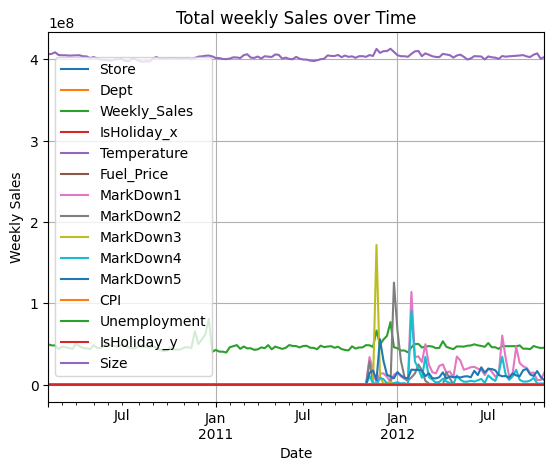

In [45]:
#total sales over time 

#group by date and sum sales
sales_over_time=df.groupby('Date').sum('Weekly_sales')

import matplotlib.pyplot as plt


plt.figure(figsize=(14,6))
sales_over_time.plot()
plt.title("Total weekly Sales over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


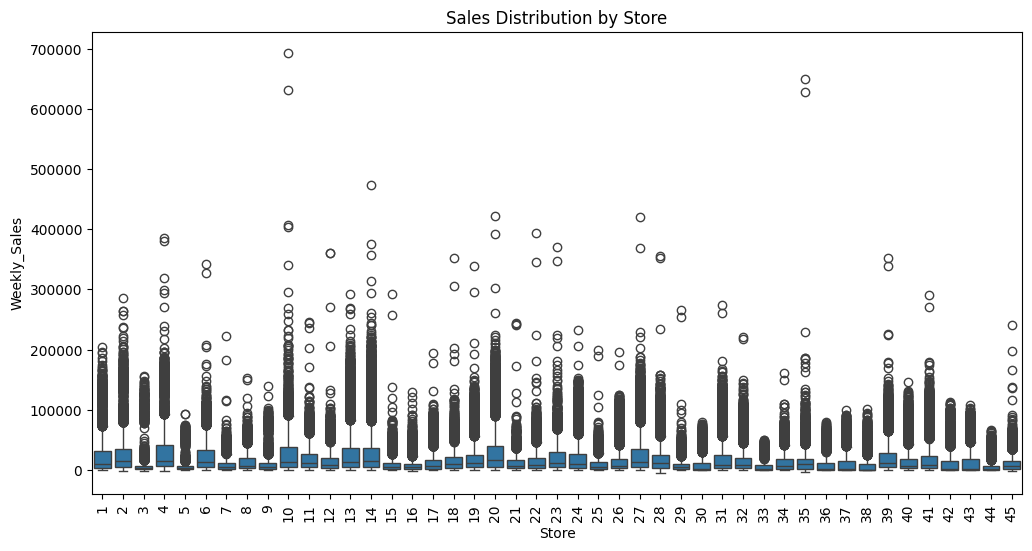

In [46]:
#Sales by Store

import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Store',y='Weekly_Sales')
plt.title("Sales Distribution by Store")
plt.xticks(rotation=90)
plt.show()

In [47]:
list(df.columns)


['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday_x',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday_y',
 'Type',
 'Size']

In [48]:
#checking if two columns are identical
print(df[['IsHoliday_x','IsHoliday_y']].head(10))

   IsHoliday_x  IsHoliday_y
0        False        False
1         True         True
2        False        False
3        False        False
4        False        False
5        False        False
6        False        False
7        False        False
8        False        False
9        False        False


In [49]:
#deleting one identical column
df=df.drop(columns=['IsHoliday_y'])

In [50]:
df=df.rename(columns={'IsHoliday_x':'IsHoliday'})

In [51]:
holiday_sales=df[df['IsHoliday']==True]

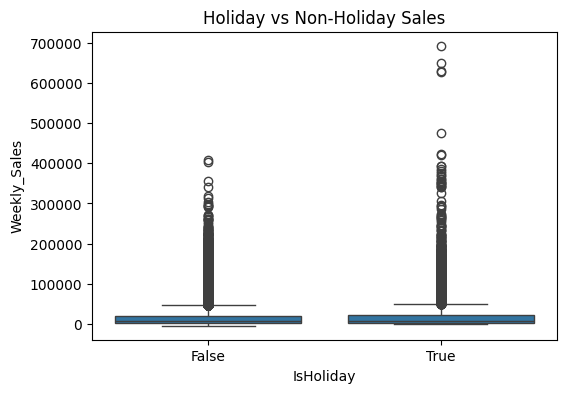

In [52]:
#impact of holidays

plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='IsHoliday',y='Weekly_Sales')
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

Average Weekly Sales:
                Store       Dept  Weekly_Sales  Temperature  Fuel_Price  \
IsHoliday                                                                
False      22.202473  44.252633  15901.445069    60.881518    3.370901   
True       22.175078  44.361856  17035.823187    49.632550    3.230557   

             MarkDown1     MarkDown2     MarkDown3    MarkDown4    MarkDown5  \
IsHoliday                                                                      
False      7332.984933   2298.528959    195.831724  3384.219730  4722.908034   
True       6240.733956  13048.763547  15077.548736  3371.283148  3536.647067   

                  CPI  Unemployment           Size  
IsHoliday                                           
False      171.222884      7.954927  136717.966867  
True       170.925303      8.031131  136859.369576  


<Figure size 600x400 with 0 Axes>

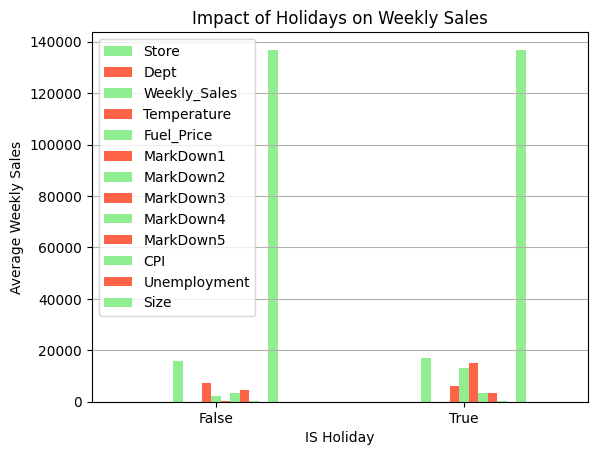

In [53]:
#group by holiday status and calculate average weekly sales
holiday_impact=df.groupby('IsHoliday').mean('Weekly_Sales')

#display the result 
print("Average Weekly Sales:\n",holiday_impact)

#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
holiday_impact.plot(kind='bar',color=['lightgreen','tomato'])
plt.title("Impact of Holidays on Weekly Sales")
plt.ylabel("Average Weekly Sales")
plt.xlabel("IS Holiday")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

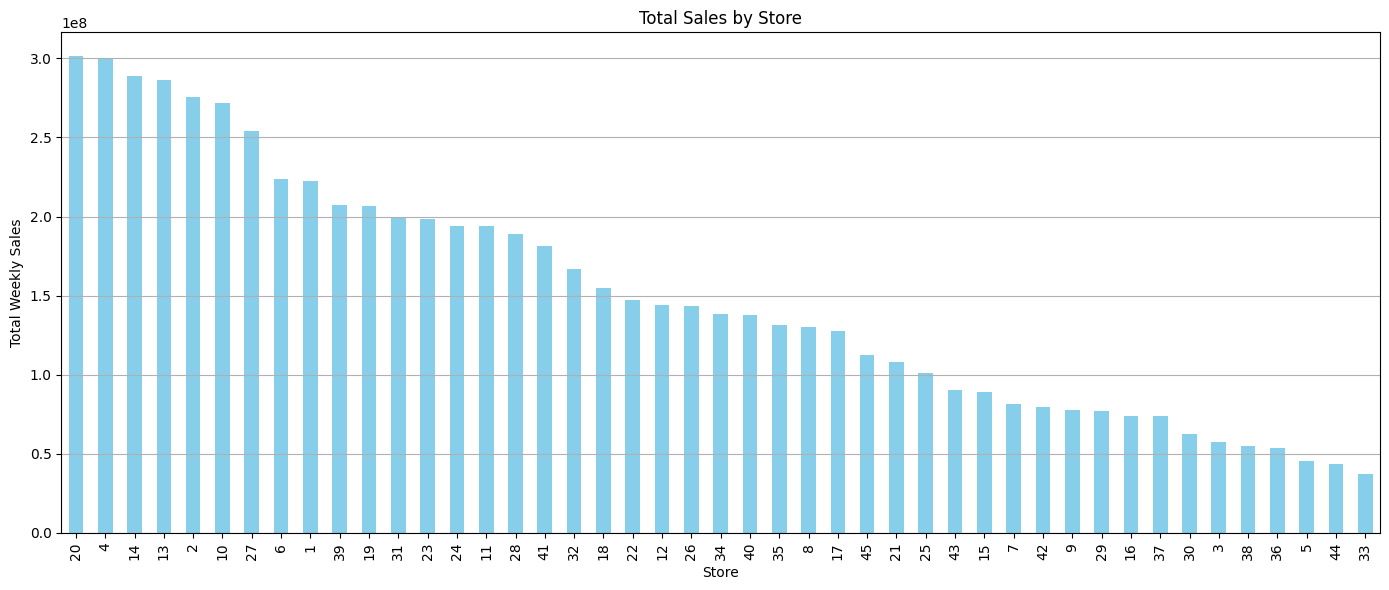

In [54]:
#total sales y store

store_sales = df.groupby('Store')['Weekly_Sales'].sum('Weekly_Sales').sort_values(ascending=False)

plt.figure(figsize=(14, 6))
store_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


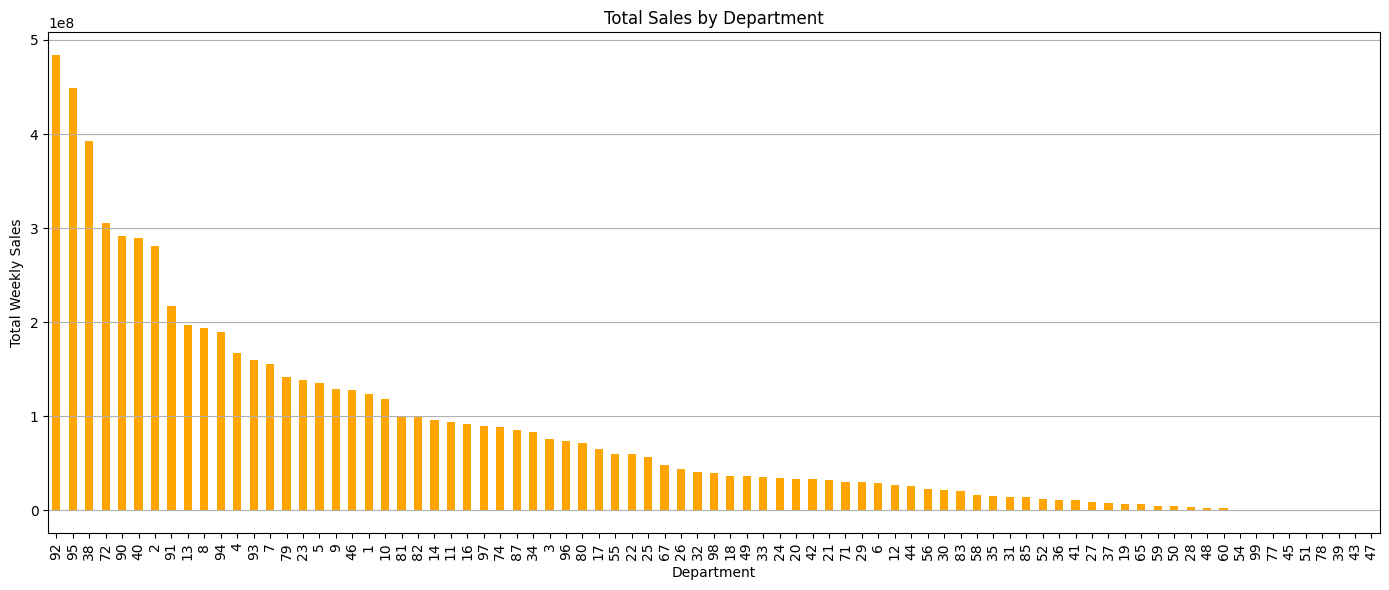

In [55]:
#toal sales by department

dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
dept_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Weekly Sales")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [56]:
print(df.shape)
print(df.head())

(421570, 16)
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106  

In [60]:
#covert date into datetime
df['Date'] = pd.to_datetime(df_grouped['Date'],errors='coerce')


In [61]:
#extract features from date

df_grouped['Year'] = df_grouped['Date'].dt.year
df_grouped['Month'] = df_grouped['Date'].dt.month
df_grouped['Week'] = df_grouped['Date'].dt.isocalendar().week
df_grouped['DayOfWeek'] = df_grouped['Date'].dt.dayofweek



In [62]:
print(df_grouped.shape)
print(df_grouped.head())

(6435, 10)
   Store       Date  Weekly_Sales  Weekly_Sales_Lag1  Year  Month  Week  \
0      1 2010-02-05    1643690.90                NaN  2010      2     5   
1      1 2010-02-12    1641957.44         1643690.90  2010      2     6   
2      1 2010-02-19    1611968.17         1641957.44  2010      2     7   
3      1 2010-02-26    1409727.59         1611968.17  2010      2     8   
4      1 2010-03-05    1554806.68         1409727.59  2010      3     9   

   DayOfWeek     Sales_MA3  Weekly_Sales_RollingMean_4  
0          4           NaN                1.643691e+06  
1          4           NaN                1.642824e+06  
2          4  1.632539e+06                1.632539e+06  
3          4  1.554551e+06                1.576836e+06  
4          4  1.525501e+06                1.554615e+06  


In [63]:
#aggregate weekly sales per store date

df_grouped = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()


In [64]:
#creating a lag feature so that it can learn from previous weeks

df_grouped['Weekly_Sales_Lag1'] = df_grouped.groupby('Store')['Weekly_Sales'].shift(1)


In [65]:
#covert date into datetime
df['Date'] = pd.to_datetime(df_grouped['Date'],errors='coerce')


In [66]:
#extract features from date

df_grouped['Year'] = df_grouped['Date'].dt.year
df_grouped['Month'] = df_grouped['Date'].dt.month
df_grouped['Week'] = df_grouped['Date'].dt.isocalendar().week
df_grouped['DayOfWeek'] = df_grouped['Date'].dt.dayofweek



In [67]:
print(df_grouped.columns.tolist())

['Store', 'Date', 'Weekly_Sales', 'Weekly_Sales_Lag1', 'Year', 'Month', 'Week', 'DayOfWeek']


In [68]:
print(df_grouped[df_grouped['Date'].isnull()])

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Weekly_Sales_Lag1, Year, Month, Week, DayOfWeek]
Index: []


In [69]:
#train a ml model to predict the weekly sales

#preparing the data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop NA rows (from lag feature or missing values)
df_model = df_grouped.dropna()

# Features and Target
features = ['Store', 'Year', 'Month', 'Week', 'DayOfWeek', 'Weekly_Sales_Lag1']
X = df_model[features]
y = df_model['Weekly_Sales']


In [70]:
#split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [71]:
#traning the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
#predict and evaluate

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 5478597834.76
R² Score: -0.08


In [73]:
#checking for missing values
print(df_grouped.isnull().sum())


Store                0
Date                 0
Weekly_Sales         0
Weekly_Sales_Lag1    1
Year                 0
Month                0
Week                 0
DayOfWeek            0
dtype: int64


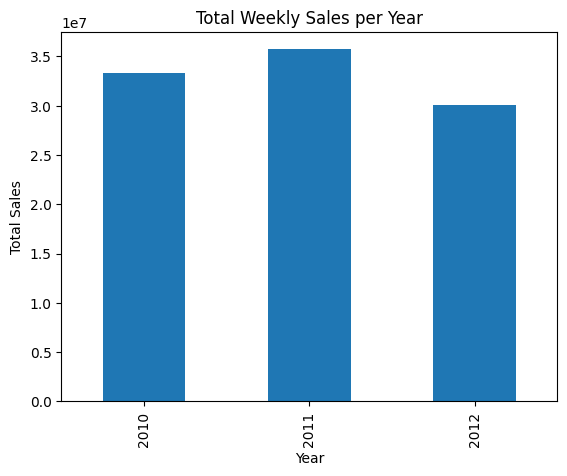

In [74]:
#visualize the Sales trends

import matplotlib.pyplot as plt

# Total sales per year
df_grouped.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar')
plt.title("Total Weekly Sales per Year")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.show()


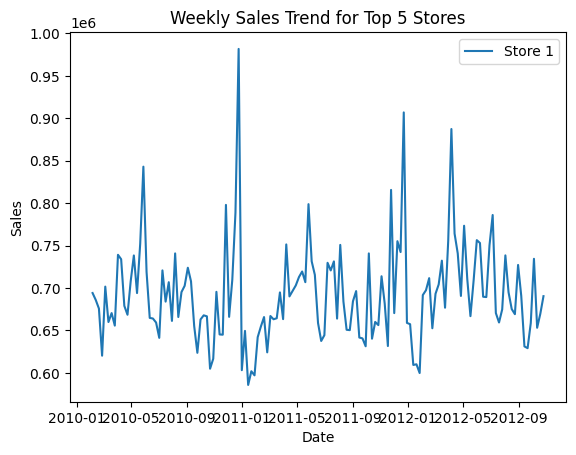

In [75]:
#store wise trends

top_stores = df_grouped['Store'].value_counts().head(5).index

for store in top_stores:
    df_store = df_grouped[df_grouped['Store'] == store]
    plt.plot(df_store['Date'], df_store['Weekly_Sales'], label=f"Store {store}")

plt.legend()
plt.title("Weekly Sales Trend for Top 5 Stores")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


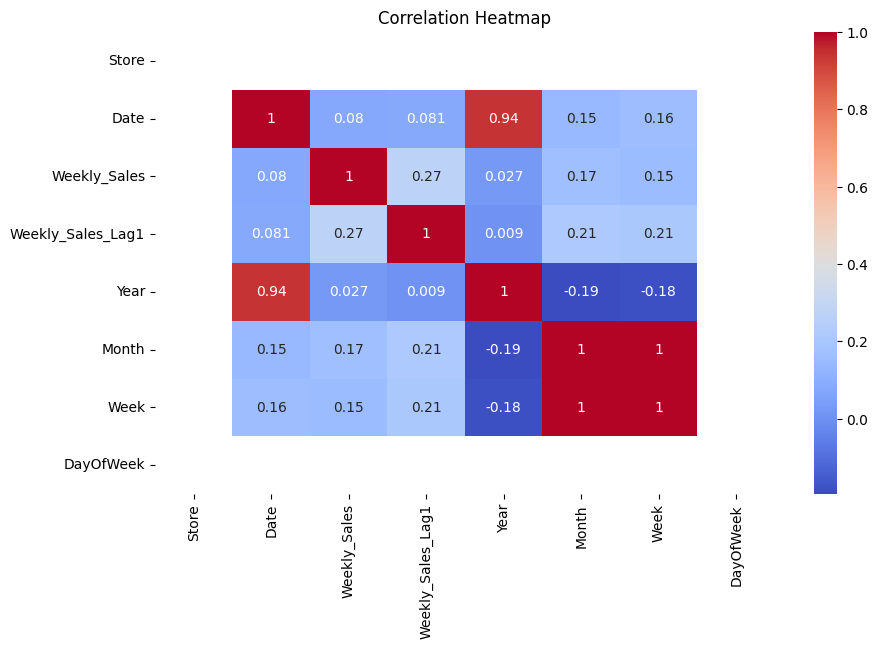

In [76]:
#to find the relationship between variables

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_grouped.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#FEATURE ENGEERING

In [77]:
#feature
df_grouped['Sales_MA3'] = df_grouped.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=3).mean())


In [78]:
#rolling Mean feature

df_grouped['Weekly_Sales_RollingMean_4'] = (
    df_grouped.groupby('Store')['Weekly_Sales']
    .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)


In [79]:
#sales difference from previous weeks

df_grouped['Weekly_Sales_Diff1'] = (
    df_grouped['Weekly_Sales'] - df_grouped['Weekly_Sales_Lag1']
)


In [80]:
df_encoded = pd.get_dummies(df[['Store', 'Type']], columns=['Type'], drop_first=True)

# Merge it back with df_grouped
df_grouped = pd.merge(df_grouped, df_encoded.drop_duplicates('Store'), on='Store', how='left')


In [81]:
#fill the missing values

df_grouped.fillna(0, inplace=True)


In [82]:
print(df_grouped.shape)
df_grouped.head()



(143, 13)


,Store,Date,Weekly_Sales,Weekly_Sales_Lag1,Year,Month,Week,DayOfWeek,Sales_MA3,Weekly_Sales_RollingMean_4,Weekly_Sales_Diff1,Type_B,Type_C
0,1,2010-02-05,694079.83,0.00,2010,2,5,4,0.000000,694079.8300,0.00,False,False
1,1,2010-02-12,685906.69,694079.83,2010,2,6,4,0.000000,689993.2600,-8173.14,False,False
2,1,2010-02-19,675760.99,685906.69,2010,2,7,4,685249.170000,685249.1700,-10145.70,False,False
3,1,2010-02-26,620222.18,675760.99,2010,2,8,4,660629.953333,668992.4225,-55538.81,False,False
4,1,2010-03-05,701635.36,620222.18,2010,3,9,4,665872.843333,670881.3050,81413.18,False,False


In [ ]:
#MODEL BULIDING PHASE

In [83]:
#defining the features and targets

# Define your feature columns (update based on your engineered columns)
feature_cols = [
    'Weekly_Sales_Lag1',
    'Weekly_Sales_RollingMean_4',
    'Weekly_Sales_Diff1',
    'Year', 'Month', 'Week', 'DayOfWeek',
    'Type_B', 'Type_C'  # Only if you did one-hot encoding
]

# Target variable
target_col = 'Weekly_Sales'

X = df_grouped[feature_cols]
y = df_grouped[target_col]


In [84]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [85]:
#training the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", RMSE)
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 19280.055952796836
RMSE: 25784.49861389913
R2 Score: 0.8086544214399516


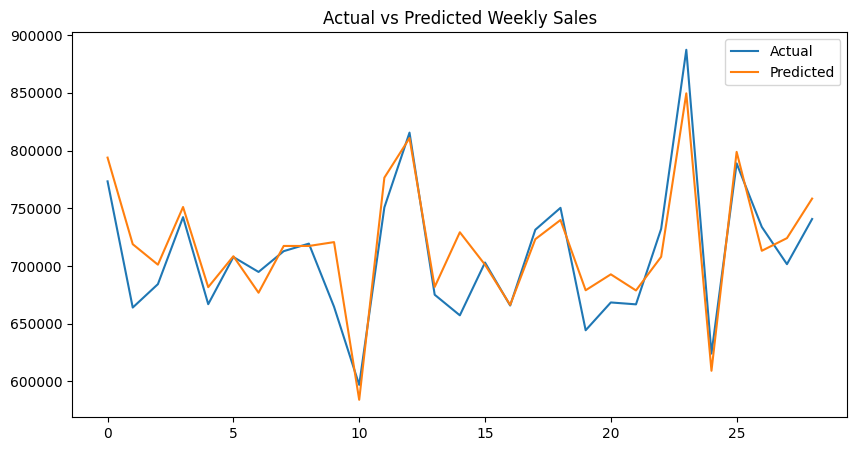

In [94]:
#plot vs predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Weekly Sales")
plt.show()


In [95]:
#rondom forest regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 15402.229583046954


In [96]:
#xgboost regressor

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 12195.657405841554


In [98]:
#comparing all three different models

results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [RMSE, rmse_rf, rmse_xgb]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


               Model          RMSE
0  Linear Regression  25784.498614
1      Random Forest  15402.229583
2            XGBoost  12195.657406


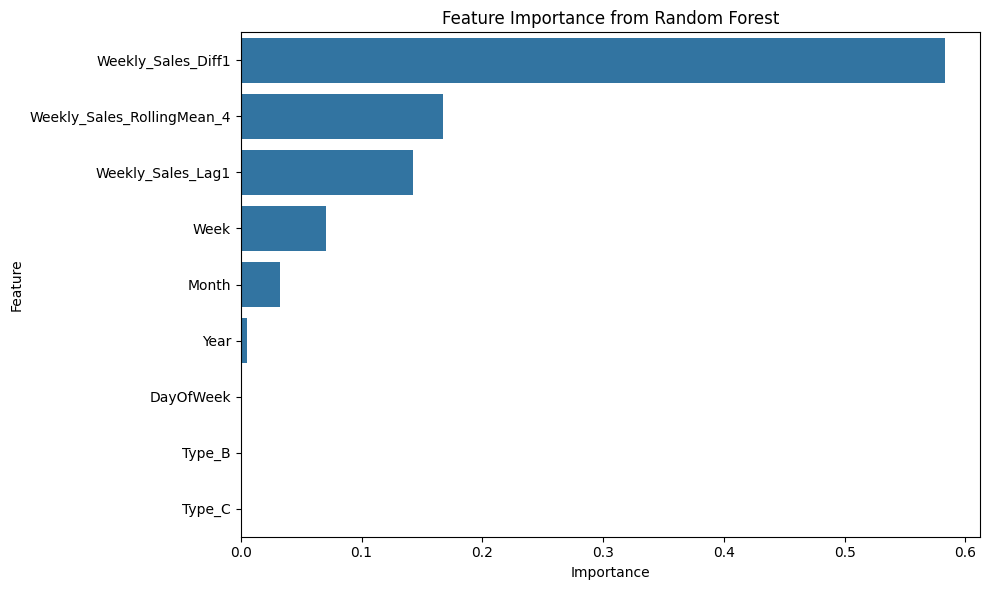

In [99]:
#feature importance analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


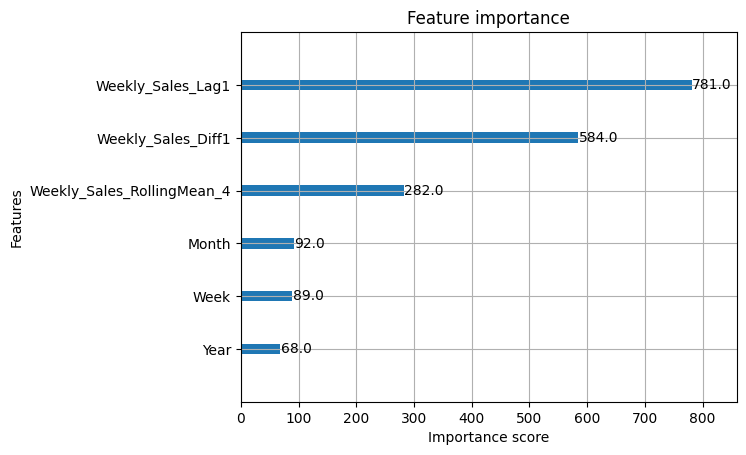

In [100]:
#XGboost

from xgboost import plot_importance
plot_importance(xgb, max_num_features=10)
plt.show()


In [111]:
#save the best model for resuse

import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(rf, 'best_model.pkl')

# To load the model later:
# loaded_model = joblib.load('best_model.pkl')


['best_model.pkl']

In [123]:
import joblib

# Load the saved model
best_model = joblib.load('best_model.pkl')


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate using test data
y_pred = loaded_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Evaluation - MAE:", mae, "| RMSE:", rmse, "| R²:", r2)


Model Evaluation - MAE: 10989.550934482711 | RMSE: 15402.229583046954 | R²: 0.9317239740287065


In [127]:
print(X_train.columns)


Index(['Weekly_Sales_Lag1', 'Weekly_Sales_RollingMean_4', 'Weekly_Sales_Diff1',
       'Year', 'Month', 'Week', 'DayOfWeek', 'Type_B', 'Type_C'],
      dtype='object')


In [ ]:
#predicting the sales for new data(X_new)

In [128]:
import pandas as pd

X_new = pd.DataFrame([{
    'Weekly_Sales_Lag1': 15000.0,
    'Weekly_Sales_RollingMean_4': 14750.0,
    'Weekly_Sales_Diff1': 250.0,
    'Year': 2012,
    'Month': 5,
    'Week': 20,
    'DayOfWeek': 5,
    'Type_B': 0,
    'Type_C': 1
}])



In [129]:
pred = best_model.predict(X_new)
print("Predicted Weekly Sales:", pred)


Predicted Weekly Sales: [634479.2447]
